# __*Tugas Kelompok Machine Learning*__

## __*Kelompok 2 (Clustering)*__

*Christian Pentagon B (H071191061)*

*Fauzi Asham Nasrul (H071191020)*

*Muhammad Fajri Rasid (H071191051)*


*Muh Yusuf Syam (H071191044)*

## __*Klusterisasi Mixed Datatypes Adult Dataset*__

*Import Package Yang dibutuhkan*

In [1]:
# Library untuk pengolahan data
import pandas as pd
import numpy as np
from collections import Counter

# Library untuk preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Library untuk visualisasi
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm, colors

# Library untuk klustering
! pip install kmodes
from kmodes.kprototypes import KPrototypes

# Library untuk evaluasi
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

# Untuk mengabaikan warning
import warnings
warnings.filterwarnings("ignore")

## __*Dataset*__
Dataset ini diambil dari  [1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics)](https://www.census.gov/en.html).

#### __*Profil Dataset*__
* Karakteristik Dataset : Multivariate (Numerik & Kategorik)
* Jumlah Kolom : 15 (14 Atribut, 1 Target)
* Jumlah Data : 48.842 baris
* Link Dataset : [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult)


#### __*Atribut Dataset*__
* **age** </br>
Umur responden (numerik).

* **workclass** </br>
Istilah umum untuk mewakili status kerja responden (kategorik). Kategorinya adalah sebagai berikut.
> - Private : privasi
> - Self-emp-inc : bekerja sebagai wiraswasta
> - Self-emp-not-inc : bekerja sebagai wiraswasta tidak berbadan hukum
> - Federal-gov : bekerja untuk pemerintah tingkat federal (negara)
> - State-gov : bekerja untuk pemerintah tingkat negara bagian
> - Local-gov : bekerja untuk pemerintah tingkat daerah
> - Without-pay : bekerja sebagai sukarelawan
> - Never-worked : pengangguran

* **fnlwgt** </br>
Final weight. Jumlah orang yang menurut sensus diwakili oleh entri tersebut (numerik).

* **education** </br>
Pendidikan terakhir yang telah ditempuh oleh responden (kategorik). Kategorinya adalah Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* **education-num** </br>
Pendidikan terakhir yang telah ditempuh oleh responden yang telah diurutkan berdasarkan nomor (numerik).

* **marital-status** </br>
Status perkawinan responden (kategorik). Kategorinya adalah sebagai berikut.
> - Married-civ-spouse : Orang yang menikah dengan warga sipil.
> - Married-AF-spouse : Orang yang menikah dengan seorang dari angkatan bersenjata.
> - Divorced : Telah bercerai.
> - Never-married : Tidak pernah menikah.
> - Separated : Orang yang hidup terpisah dari pasangannya tetapi masih menikah secara sah sampai mendapatkan putusan untuk cerai.
> - Widowed : Orang yang tidak menikah lagi karena kematian pasangannya dan belum kawin lagi.
> - Married-spouse-absent : Orang yang menikah tapi pasangannya tidak tinggal dalam rumah tangga yang sama.

* **occupation** </br>
Jenis pekerjaan umum responden (kategorik). Kategorinya adalah Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* **relationship** </br>
Status keluarga responden (kategorik). Kategorinya adalah Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* **race** </br>
Ras dari responden (kategorik). Kategorinya adalah White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* **sex** </br>
Jenis kelamin responden (kategorik). Kategorinya adalah Male dan Female.

* **capital gain** </br>
Keuntungan modal (hanya jika melakukan aktivitas investasi, jika tidak maka akan diset menjadi 0) (numerik).

* **capital loss** </br>
Kerugian modal (numerik).

* **hours-per-week** </br>
Jam kerja responden per minggu (numerik).

* **native-country** </br>
Negara asal responden (kategorik). Kategorinya adalah United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* **target (income)** </br>
Apakah seseorang menghasilkan lebih dari $50.000 per tahun atau tidak (<=50k, >50k).

Memuat dataset adult. Karena dataset pada [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) terbagi menjadi data train dan test, maka akan dimuat secara terpisah, lalu digabung / concat kemudian ditampung pada variabel df

In [2]:
# Memuat data train dari adult dataset
adult_train= pd.read_csv('https://drive.google.com/uc?export=download&id=12g0OFCkVs2XJ9Y1alS6J4WpLZzsqJM2u', header=None)

# Memuat data test dari adult dataset
adult_test= pd.read_csv('https://drive.google.com/uc?export=download&id=1xcNZ5jPOHZWjWyT4PMGmkuDxU60zeq_c', header=None)

# Menggabungkan kedua dataframe dengan pd.concat
df= pd.concat([adult_train, adult_test], axis='rows').reset_index(drop=True)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Memberikan header kolom pada dataframe

In [3]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary_per_year']

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_per_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Bisa dilihat, pada kolom salary_per_year dalam dataframe, terdapat nilai / value yang berakhir dengan titik (.) , untuk menghindari error kedepannya, maka akan dilakukan operasi string yaitu menghapus titik pada data jika data tersebut mengandung titik

In [4]:
# Me-replace string titik pada target dengan string kosong
df['salary_per_year']= df['salary_per_year'].str.replace('.', '')

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_per_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Kita juga melakukan operasi string yaitu strip, operasi ini dilakukan untuk menghapus spasi di awal dan akhir dari string 

In [5]:
# Melakukan perulangan pada setiap kolom df yang hanya ber-dtype object saja (kategorikal)
for i in df.select_dtypes(object).columns:

    # Menghapus spasi di awal maupun akhir dari setiap data pada kolom
    df[i]= df[i].str.strip()

Karena dataset bersifat *multivariate*, maka beberapa prosedur untuk kolom numerik dan kategorik seperti preprocessing dan visualisasi pada dataset dilakukan secara terpisah. Untuk menghindari penulisan kode yang berulang maka dibuat fungsi yang mengembalikan daftar kolom kategorik dan numerik untuk memudahkan penyeleksian kolom

In [6]:
# Fungsi untuk mengembalikan daftar kolom kategorik pada dataframe yang diberikan
def categorical_cols(df):
    return df.select_dtypes(object).columns

# Fungsi untuk mengembalikan daftar kolom numerik pada dataframe yang diberikan
def numerical_cols(df):
    return df.select_dtypes(np.number).columns

# Mem-print contoh daftar kolom kategorik dan numerik dari df
print('Daftar kolom df dengan atribut kategorik:', categorical_cols(df))
print('Daftar kolom df dengan atribut numerik:', numerical_cols(df))

Daftar kolom df dengan atribut kategorik: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary_per_year'],
      dtype='object')
Daftar kolom df dengan atribut numerik: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


Menampilkan deskripsi statistik

In [7]:
# Memanggil fungsi describe
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## __*Visualization*__

Kami melakukan visualisasi data karena ringkasan visual informasi mempermudah dalam proses-proses seperti mengidentifikasi jika terdapat *pattern* atau pola tertentu pada data

Untuk visualisasi kita menggunakan *style* bawaaan dari matplotlib yaitu *fivethirtyeight*

In [8]:
# Memanggil atribut style dari pyplot untuk mengganti jenis style default dengan style yang diinginkan
plt.style.use('fivethirtyeight')

**Membuat fungsi untuk membantu visualisasi**

Fungsi untuk mengembalikan warna acak dari suatu colormap, hal ini dilakukan untuk memperindah hasil visualisasi

In [9]:
# Fungsi untuk mengembalikan warna acak dari colormap yang diberikan
def get_random_cmap(choose_cmap='Set2', color_num=2):
    cmap = cm.get_cmap(choose_cmap)
    cmap_list= [colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    
    replace= False
    if(color_num>len(cmap_list)):
        print('color is not unique anymore because color_num is bigger than cmap length')
        replace= True

    color_index= np.random.choice(cmap.N, color_num, replace=replace)
    
    return cmap_list[color_index[0]] if(color_num==1) else [cmap_list[ci] for ci in color_index]

Fungsi untuk menyamakan panjang dari dua dataframe berbeda

In [10]:
# Fungsi ini akan menyamakan panjang dari dua dataframe kategorik yang berbeda dengan cara
# Dataframe yang lebih kecil mengambil kategori dari dataframe yang lebih besar, dan mengisi frekuensinya dengan 0
def length_equalize(series1, series2):
    a= pd.DataFrame(series1.sort_index()).reset_index().iloc[::-1]
    b= pd.DataFrame(series2.sort_index()).reset_index().iloc[::-1]
    
    if(len(a)==len(b)):
        return a,b
    
    bigger, smaller_temp= (a,b) if (len(a)>len(b)) else (b,a)
    max_iteration= len(bigger.index)

    smaller= bigger.copy()

    j= 0
    for i in range(max_iteration):
        if((i<=len(smaller_temp.index)) and (bigger.iloc[i,0]==smaller_temp.iloc[j,0])):
            smaller.iloc[i,1]= smaller_temp.iloc[j,1]      
            j+= 1
        else:
            smaller.iloc[i,1]= 0
    
    return (bigger, smaller) if (bigger.equals(a)) else (smaller, bigger)

Setelah semua fungsi telah dibuat, maka selanjutnya kita akan melakukan visualisasi

* Melakukan visualisasi terhadap kolom salary_per_year yang mana merupakan target pada dataframe, dalam bentuk pie

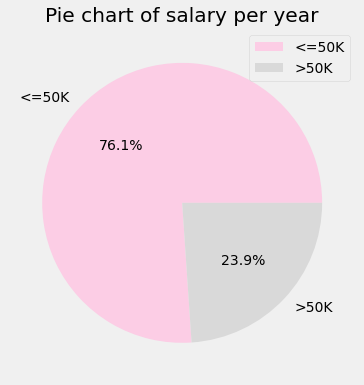

In [11]:
# Mendefinisikan slice yang akan diplot, fungsi sort_values dipanggil agar labelnya tidak tertukar saat melakukan plot
slices= df['salary_per_year'].sort_values()

# Memanggil fungsi value_counts() yang akan mengembalikan suatu kategori dan frekuensinya
target_slices= slices.value_counts()

# Memanggil fungsi unique() yang akan mengembalikan kategori unik untuk dijadikan label / legend
target_slices_labels= slices.unique()

plt.figure(figsize=(6,6))

# Melakukan plot dalam bentuk pie
plt.pie(target_slices, labels=target_slices_labels, autopct='%1.1f%%', colors=get_random_cmap('Set3', 2))

plt.legend()
plt.title('Pie chart of salary per year')

plt.show()

* Melakukan visualisasi pada masing-masing atribut, untuk atribut numerik ditampilkan histogramnya sedangkan untuk atribut kategorik ditampilkan dalam bentuk bar

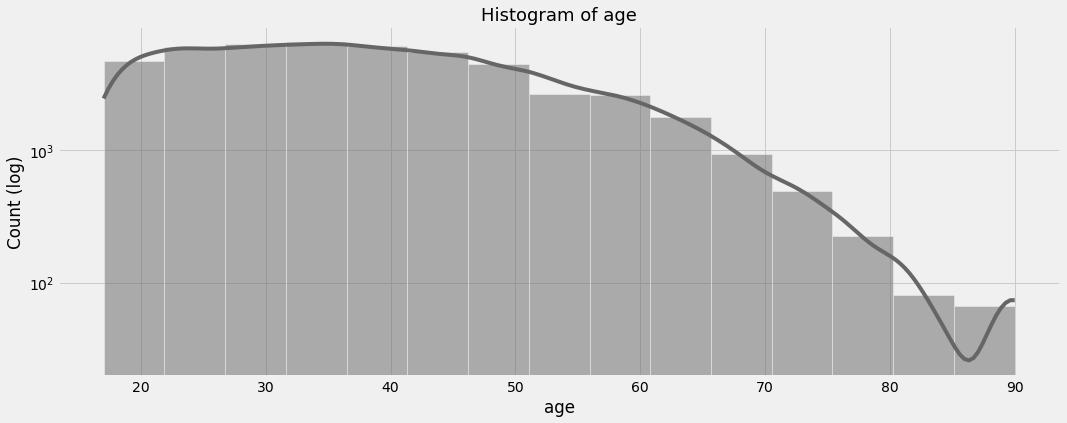

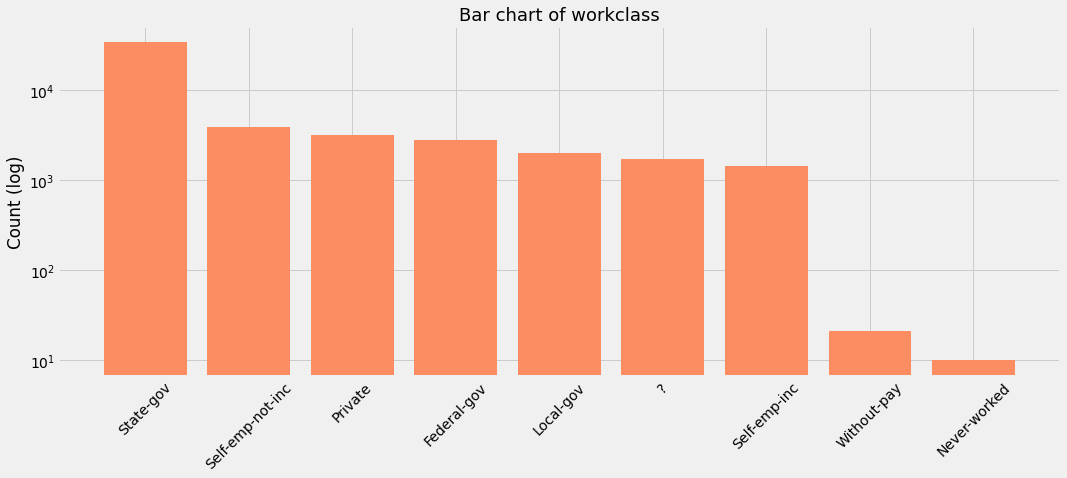

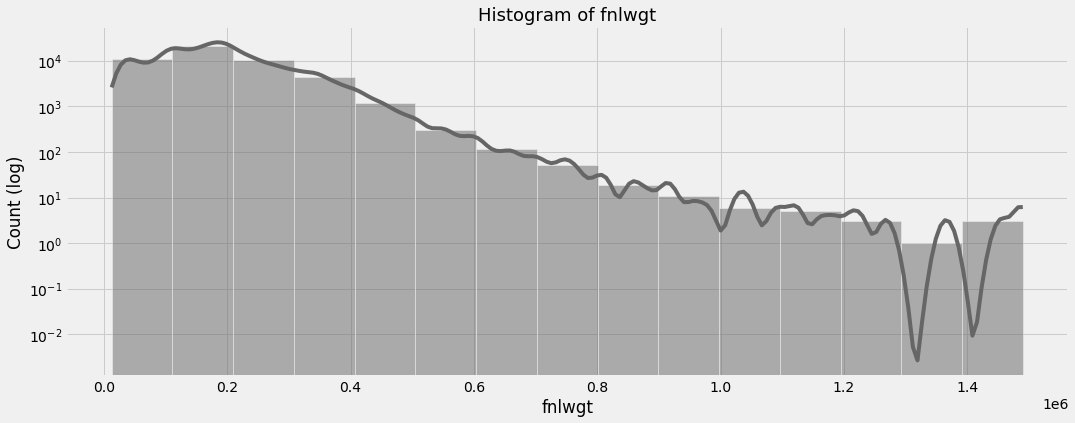

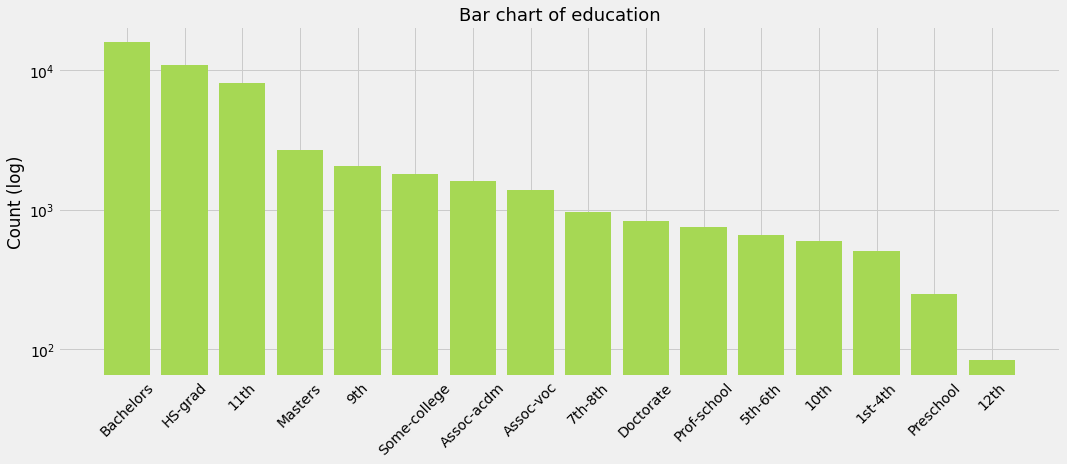

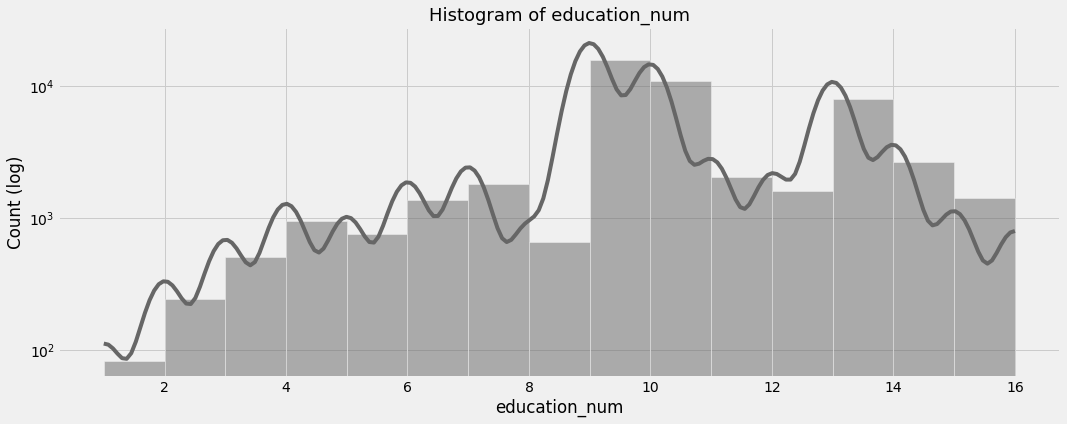

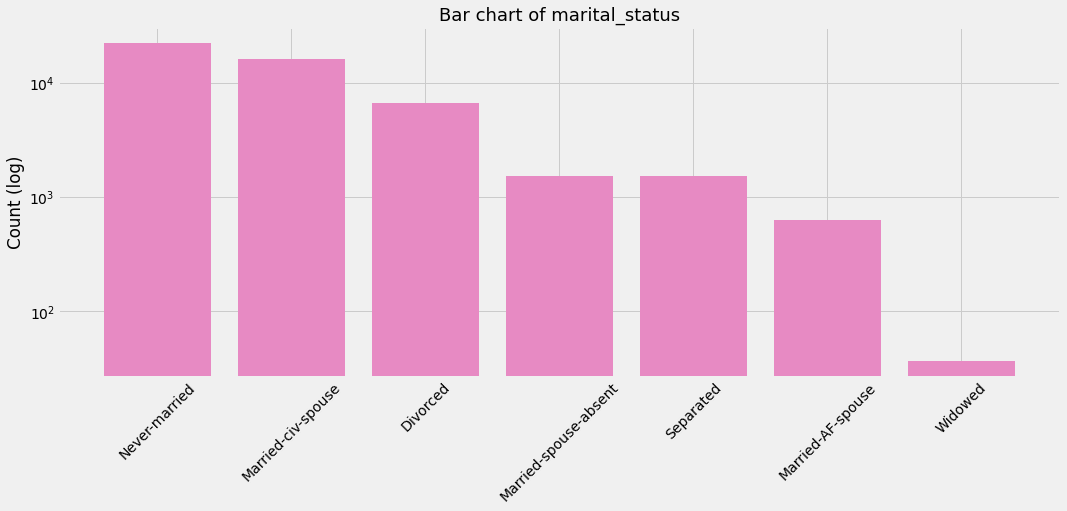

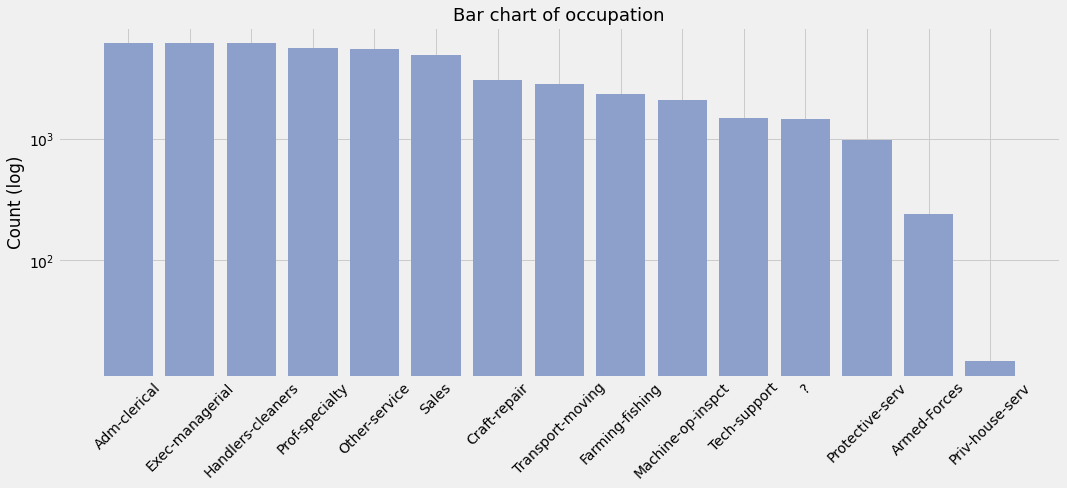

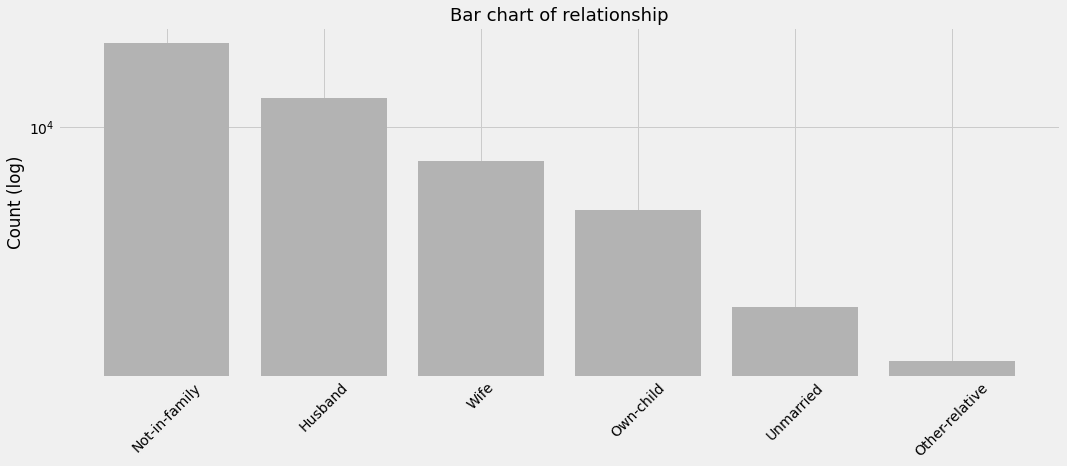

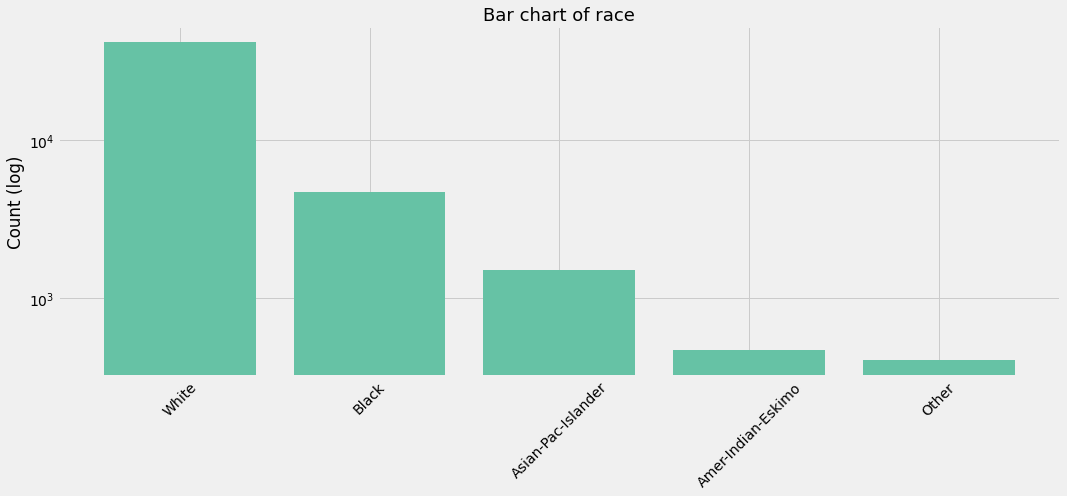

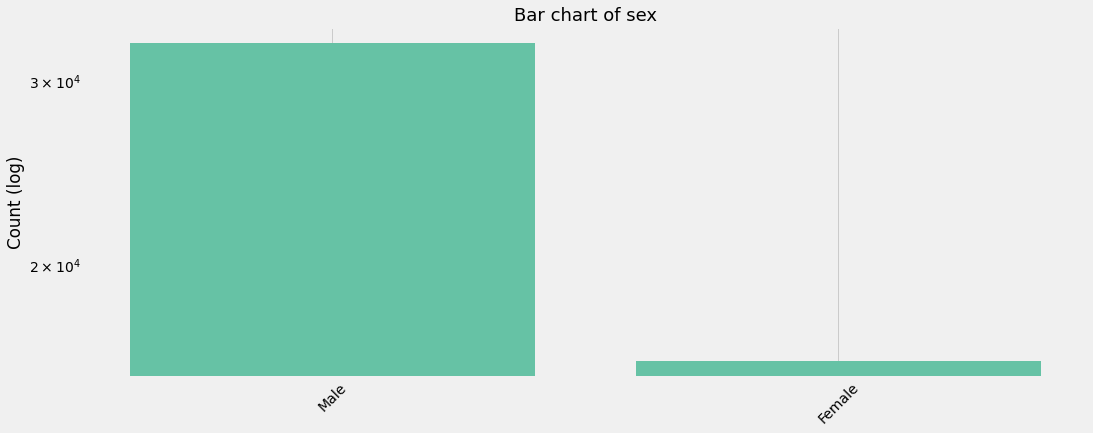

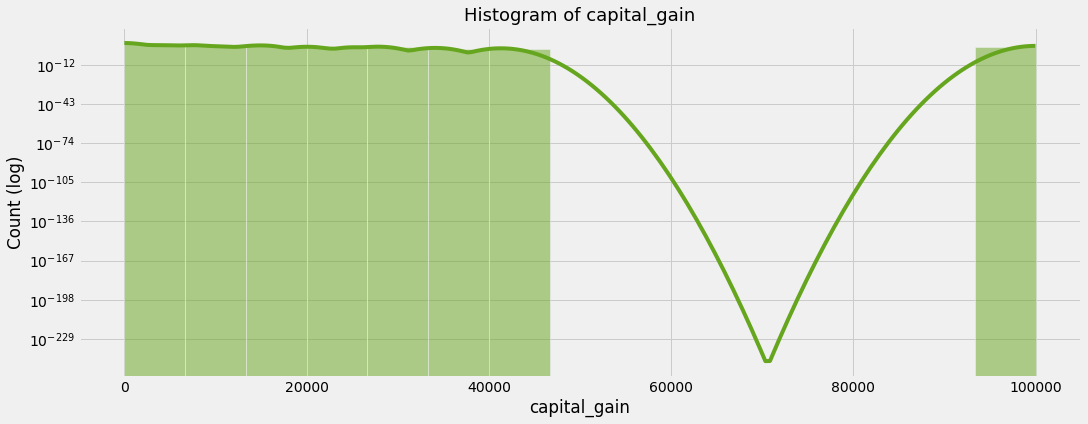

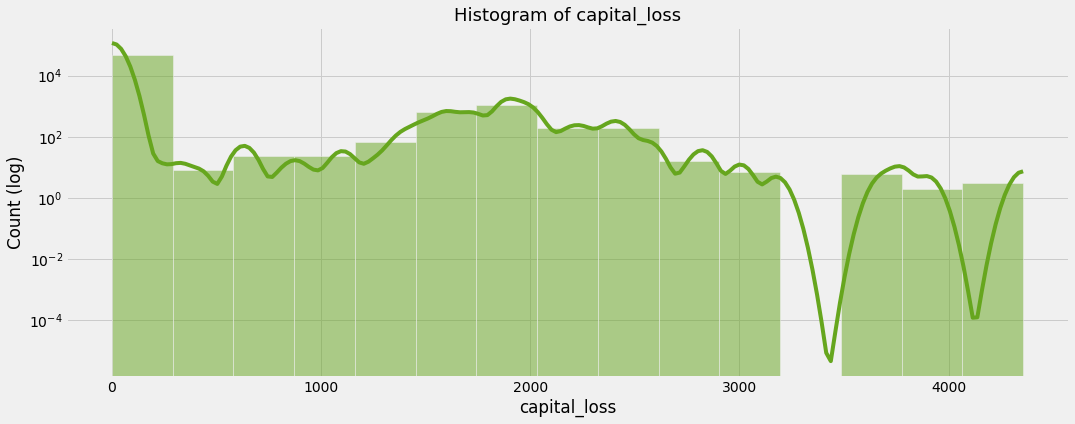

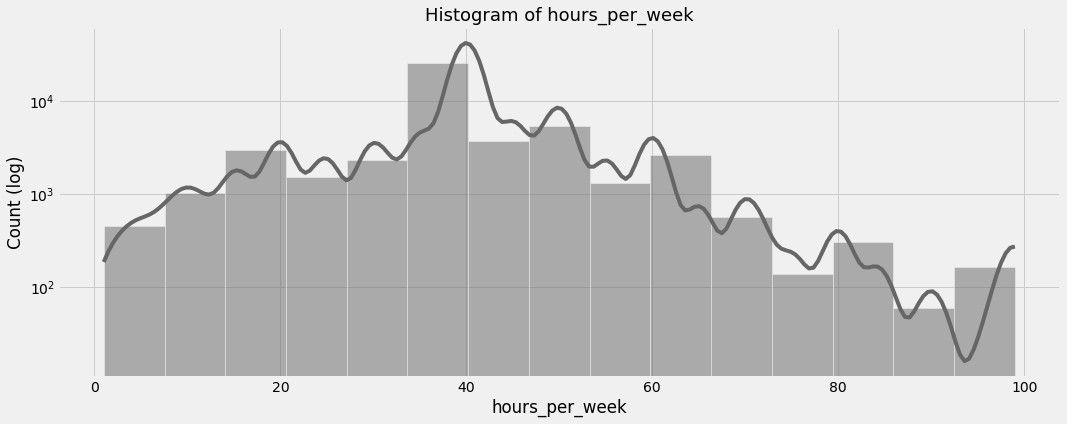

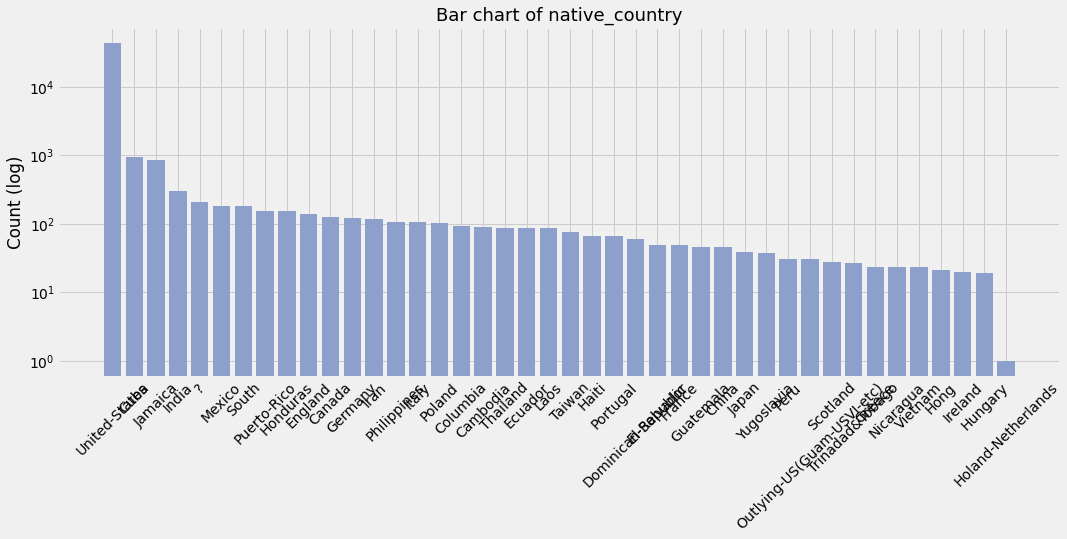

In [12]:
# Mendefinisikan variabel yang menyimpan atribut kategorik maupun numerik dari df
df_categorical_cols= categorical_cols(df[:-1])
df_numerical_cols= numerical_cols(df[:-1])

# Karena kita akan melakukan visualisasi pada setiap kolom atribut, maka akan
# Dilakukan perulangan pada setiap kolom tapi tidak dengan kolom terakhir yang mana merupakan target
for i in df.columns[:-1]:
    plt.figure(figsize=(16,6))
    
    # Memberi kondisi jika kolom berupa kolom kategorik maka akan dilakukan plot dalam bentuk bar
    if(i in df_categorical_cols):
        # Mendapatkan daftar kategori pada kolom
        unique_values= df[i].unique()

        # Mendapatkan 1 warna acak dari fungsi yang telah dibuat sebelumnya
        color= get_random_cmap('Set2', 1)
        
        # Plot kolom dalam bentuk bar
        plt.bar(unique_values, df[i].value_counts(), color= color)
        
        # Menyetel atribut-atribut dari plt
        plt.xticks(rotation=45)
        plt.title(f'Bar chart of {i}', size=18)
        
    # Jika kolom bukan merupakan kolom kategorik maka dilakukan plot dalam bentuk histogram
    else:
        # Mendapatkan 1 warna acak dari fungsi yang telah dibuat sebelumnya
        color= get_random_cmap('Dark2', 1)

        # Mendefinisikan bins (jumlah bar pada histogram)
        bins= 15
        
        # Plot kolom dalam bentuk histogram dengan seaborn
        sns.histplot(df[i], kde=True, color= color, bins= bins)
        
        # Menyetel atribut-atribut dari plt
        plt.title(f'Histogram of {i}', size=18)
    
    plt.ylabel('Count (log)')

    # Menyetel y scale atau skala y dari plot menjadi skala yang dinormalisasi dengan logaritma basis 10
    plt.yscale('log')
    plt.show()

* Membandingkan hasil visualisasi untuk row dengan salary <= 50k, dengan row dengan salary > 50k

In [13]:
def sort_by_salary(a, b, salary_count_column):
    total= a.iloc[:,1]+b.iloc[:,1]

    a[salary_count_column]= a.iloc[:,1]/total
    b[salary_count_column]= b.iloc[:,1]/total

    b= b.sort_values(by=salary_count_column, ascending=False).reset_index(drop=True)

    a= a.set_index('index')
    a= a.reindex(index=b['index'])
    a= a.reset_index()

    return a, b

In [14]:
def multiple_bar_plot(df, class1, class2, label1, label2, title, normalize):
    # Mendapatkan daftar kategori pada kolom
    unique_values= df.unique()

    # Mendefinisikan xticks
    x_indexes= np.arange(len(unique_values))

    # Mendefinisikan lebar setiap sub-bar
    width= 0.3

    # Memanggil fungsi value_counts() pada kedua kelas untuk mendapatkn kategori dan frekuensinya
    class1= class1.value_counts()
    class2= class2.value_counts()

    # Karena pada multiple bar length dari data harus sama, maka kita memanggil fungsi length_equalize yang dibuat sebelumnya
    class1, class2= length_equalize(class1, class2)

    # Mendapatkan 2 warna acak untuk masing-masing bar
    color1, color2= get_random_cmap('Set2', 2)

    class_bar_height= 'bar_height'

    class1[class_bar_height]= class1.iloc[:,1]
    class2[class_bar_height]= class2.iloc[:,1]

    if(normalize):
        class1, class2= sort_by_salary(class1, class2, class_bar_height)
    
    # Melakukan plot dalam bentuk multiple bar
    plt.bar(x_indexes-(width/2), class1[class_bar_height], width, label=label1, color=color1)
    plt.bar(x_indexes+(width/2), class2[class_bar_height], width, label=label2, color=color2)
    
    # Menyetel atribut-atribut dari plt
    plt.xticks(ticks=x_indexes, labels=class1.iloc[:, 0], rotation=45)
    plt.title(f'Bar chart of {title}', size=18, pad=20)

    # Menyetel atribut-atribut dari plt
    plt.legend()
    plt.ylabel('Count')

    if(normalize):
        plt.xticks(fontsize=10)
        for spine in plt.gca().spines.values():
            spine.set_visible(False)

        ax= plt.gca()

        # Add this loop to add the annotations
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1%}', (x + width/2, y + height*1.05), ha='center')

    plt.tight_layout()
    plt.show()

In [15]:
def multiple_hist_plot(df, class1, class2, label1, label2, title):
    # Mendapatkan 2 warna acak untuk masing-masing histogram
    color1, color2= get_random_cmap('Set2', 2)

    # Mendefinisikan bins (jumlah bar pada histogram)
    bins= 15
    
    # Melakukan plot dalam bentuk histogram dengan seaborn 2x
    sns.histplot(class1, kde=True, color= color1, bins= bins, alpha= 0.75, label= label1)
    sns.histplot(class2, kde=True, color= color2, bins= bins, alpha= 0.75, label= label2)
    
    # Menyetel atribut-atribut dari plt
    plt.title(f'Histogram of {title}', size=18)

    # Menyetel atribut-atribut dari plt
    plt.legend()
    plt.ylabel('Count (log)')
    plt.yscale('log')
    plt.tight_layout()

    plt.show()

In [16]:
# Meskipun kita akan membandingkan data dari dua class pada perulangan, sebaiknya kita mendefinisikan label di luar perulangan

def binary_dataframe_comparison(df, target_column, figsize=(16,6), bar_normalize=True):
    label1= df[target_column].unique()[0]
    label2= df[target_column].unique()[1]

    df_columns= df.columns[:-1]
    df_categorical_cols= categorical_cols(df[:-1])

    for i in df_columns:
        plt.figure(figsize=figsize)
        
        # Membagi kolom menjadi dua dataframe
        # Dataframe class1 yaitu kolom dengan salary_per_year <= 50 k begitu pula sebaliknya
        class1= df[df[target_column]==label1][i]
        class2= df[df[target_column]==label2][i]
        
        # Memberi kondisi jika kolom berupa kolom kategorik maka akan dilakukan plot dalam bentuk multiple bar
        if(i in df_categorical_cols):
            multiple_bar_plot(df[i], class1, class2, label1, label2, i, bar_normalize)
            
        # Jika kolom bukan merupakan kolom kategorik maka plot akan diisi dengan 2 histogram
        else:
            multiple_hist_plot(df[i], class1, class2, label1, label2, i)
        


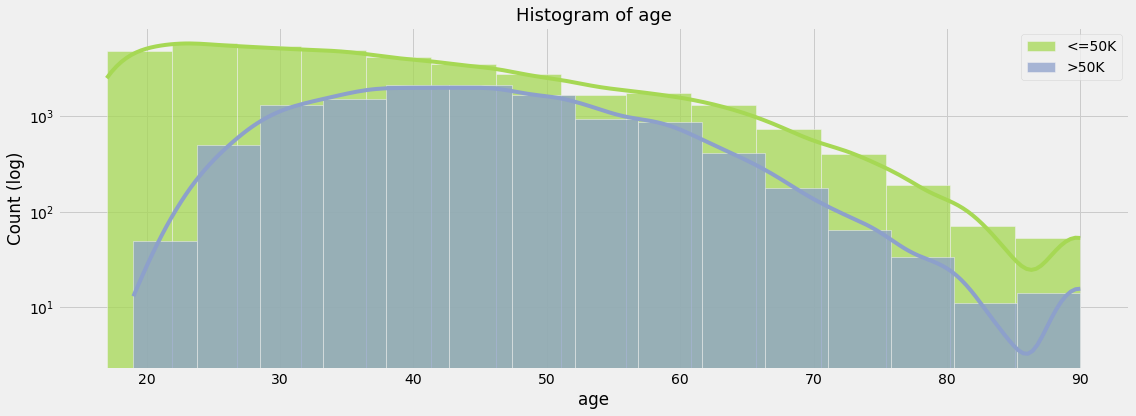

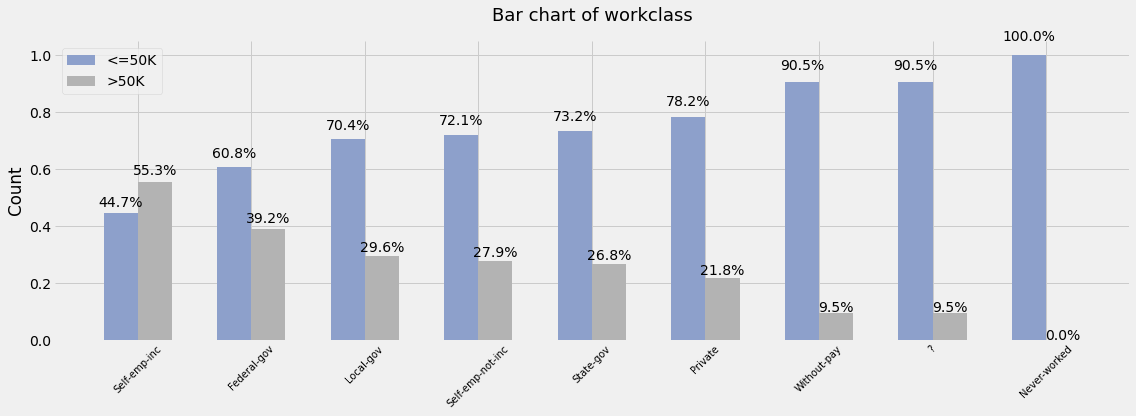

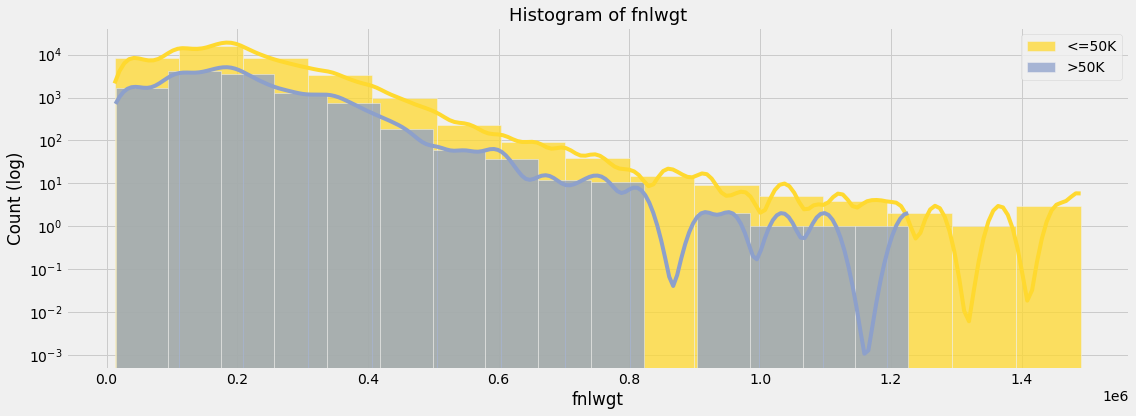

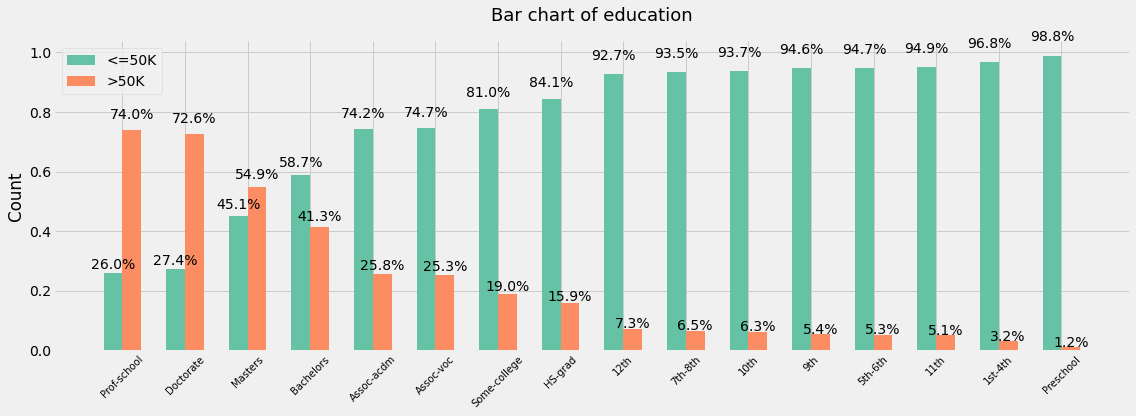

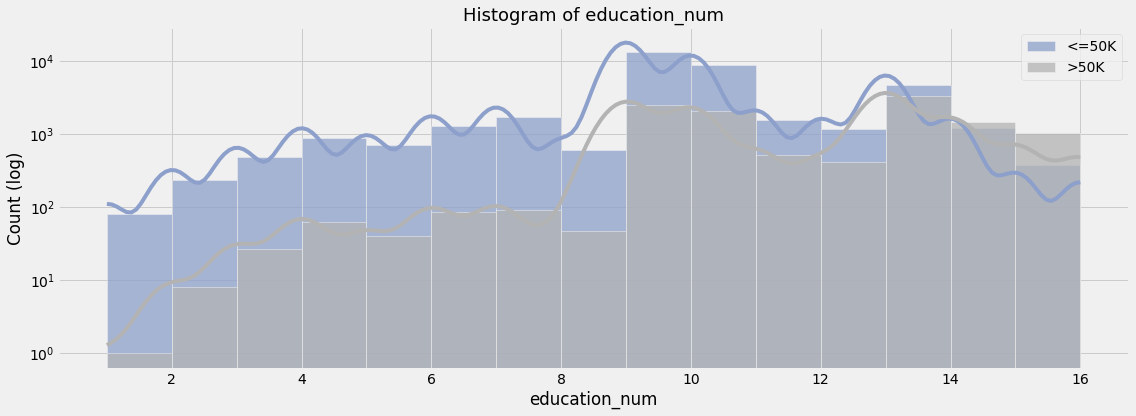

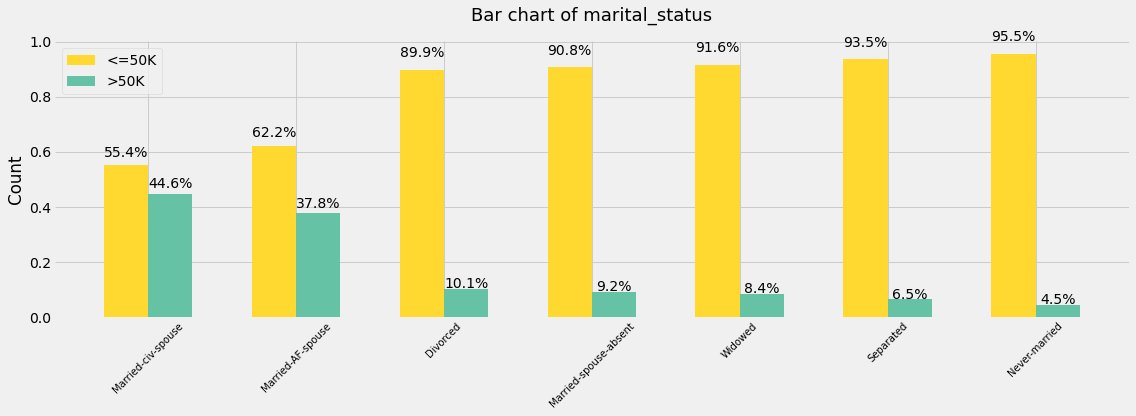

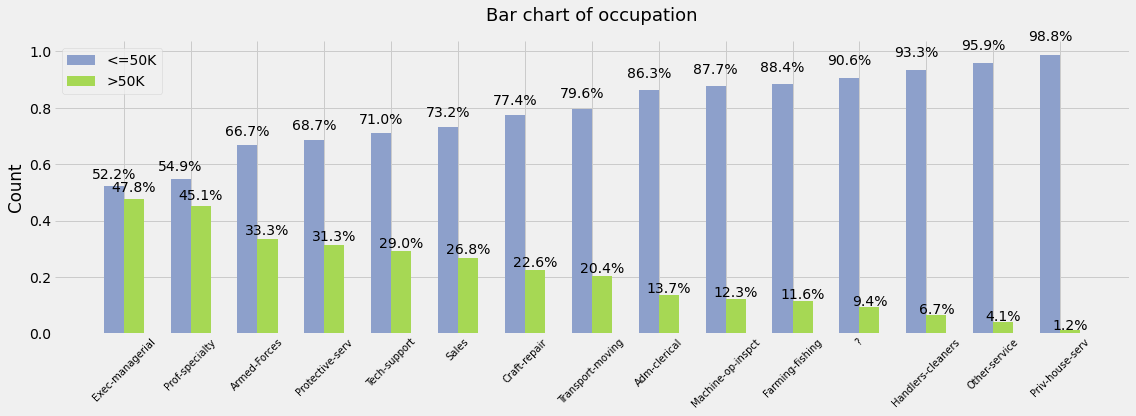

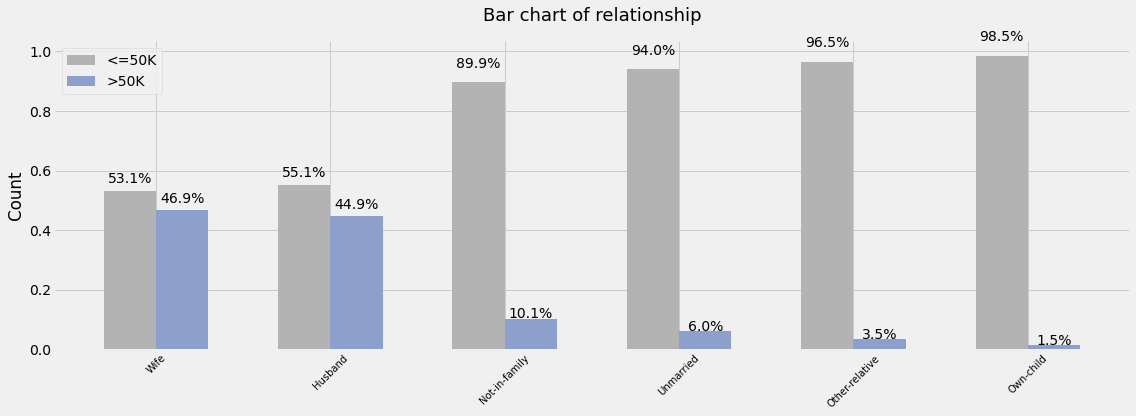

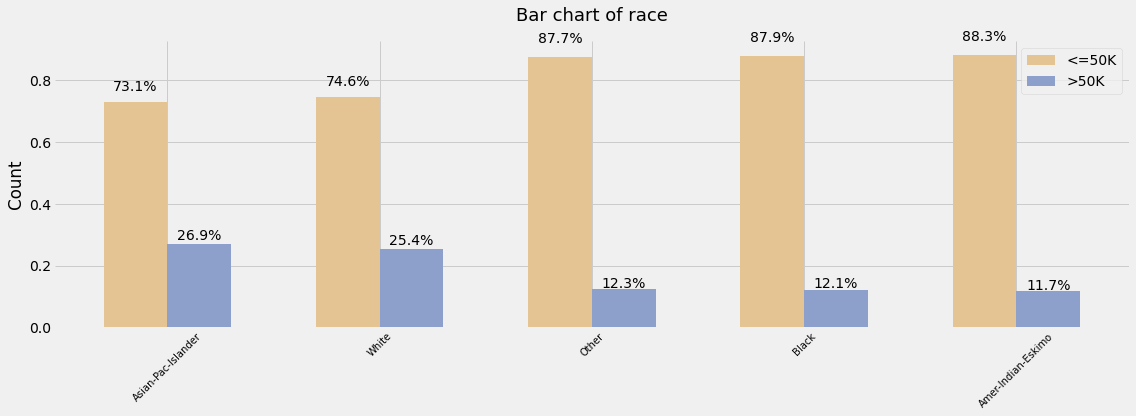

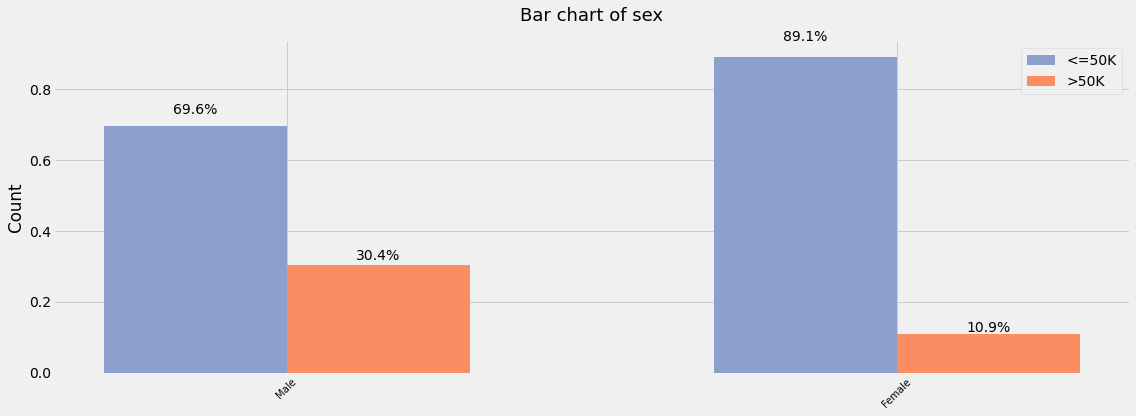

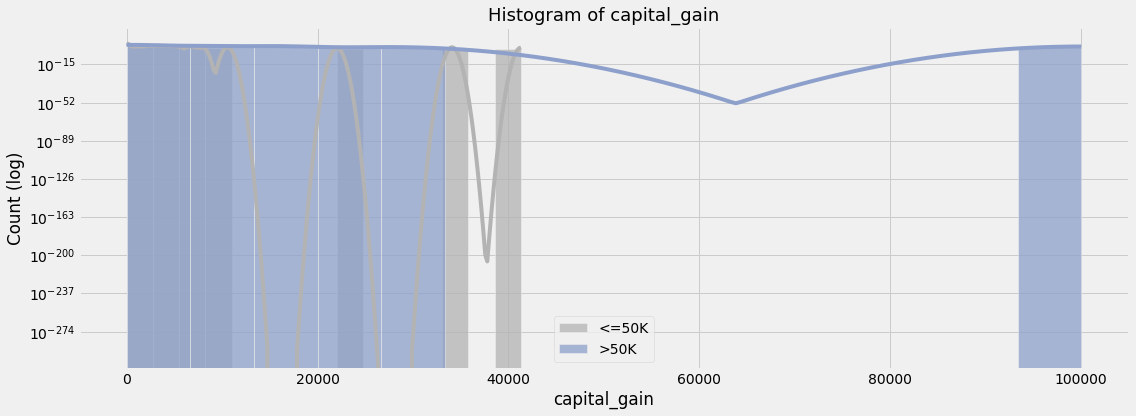

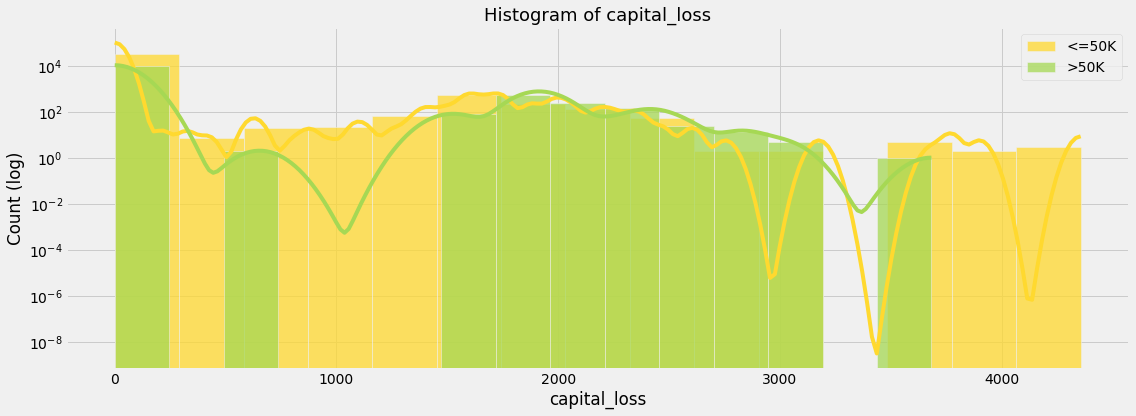

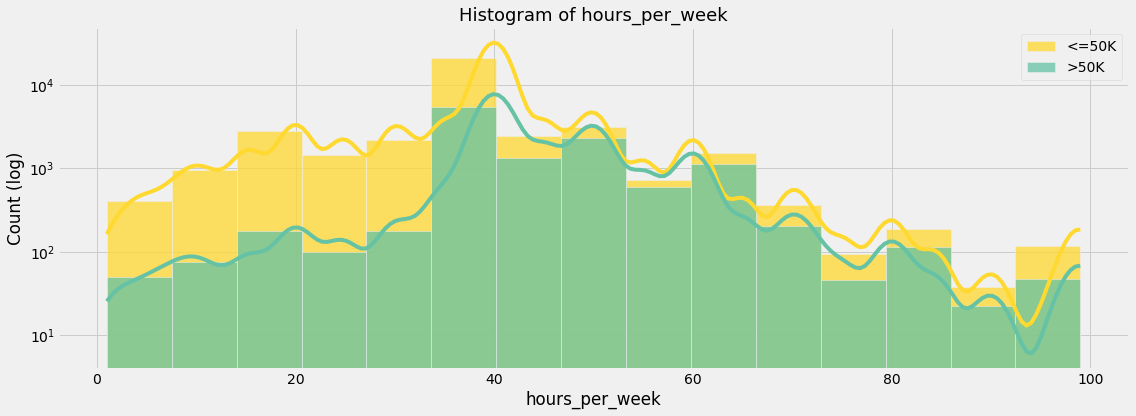

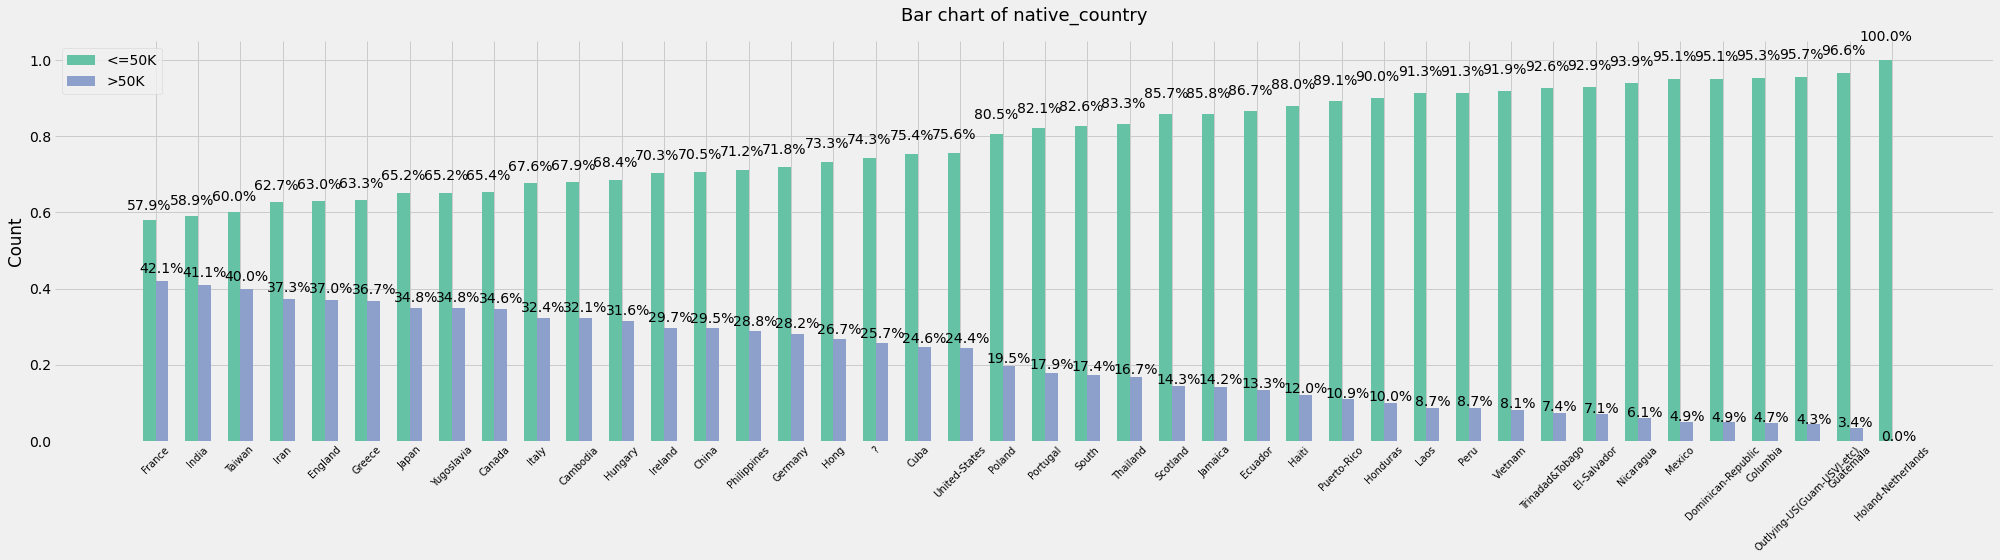

In [17]:
binary_dataframe_comparison(df.drop('native_country', axis=1), df.columns[-1])
binary_dataframe_comparison(df[['native_country', 'salary_per_year']], df.columns[-1], (28,8))

## __*Preprocessing*__

Membuat dataframe baru untuk clustering

In [18]:
# Mendefinisikan dataframe df_cluster yang akan digunakan untuk preprocessing dari dataframe df yang didrop targetnya
df_cluster= df.drop('salary_per_year', axis=1)

df_cluster

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


* **Feature Selection**

Menghapus kolom/atribut yang tidak diperlukan

* Atribut fnlwgt, yang merepresentasikan berapa banyak entry/kasus dengan data tersebut dalam satu baris, karena atribut ini tidak berpengaruh pada hasil klustering

* Atribut education yaitu pendidikan terakhir responden, di-drop karena sudah terdapat atribut lain yaitu education_num yang mana merupakan hasil encode dari atribut education ini

In [19]:
# Menghapus kolom fnlwgt dan education
df_cluster.drop(['fnlwgt', 'education'], axis='columns', inplace=True)

df_cluster.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Selanjutnya mengelompokkan atribut marital-status berdasarkan sedang mempunyai pasangan (couple), dan yang sedang sendirian (single)

In [20]:
# Membuat fungsi yang memberi kondisi pada marital status / status pernikahan
# Untuk membedakan apakah sedang sendiri atau sedang mempunyai pasangan
def marital_status_map(x):
    if(x in ['Divorced','Married-spouse-absent','Never-married','Separated','Widowed']):
        return 0
    else:
        return 1

df_cluster['marital_status']= df_cluster['marital_status'].map(marital_status_map)

df_cluster.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,13,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Setelah itu mengelompokkan workclass berdasarkan instansi/entitas kerja

In [21]:
# Membuat fungsi yang memberi kondisi pada workclass / instansi pekerjaan
# Untuk membedakan apakah seseorang bekerja pada (secara berurutan): pemerintah, privasi, perusahaan/wiraswasta, atau tanpa dibayar
def workclass_map(x):
    if(x in ['Federal-gov','Local-gov','State-gov']):
        return 'Government'
    elif(x == 'Private'):
        return 'Private'
    elif(x in ['Self-emp-inc','Self-emp-not-inc']):
        return 'Self_employed'
    else: 
        return 'Without_pay'
    
df_cluster['workclass']= df_cluster['workclass'].map(workclass_map)

df_cluster.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Government,13,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self_employed,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Selanjutnya kita akan membuat atribut baru yaitu capital_total, yang merupakan hasil pengurangan capital_gain dengan capital_loss, kemudian kita menghapus dua kolom tersebut

In [22]:
# Meng-insert atribut baru capital_total pada indeks kolom ke-8
df_cluster.insert(8, 'capital_total', df_cluster['capital_gain']-df_cluster['capital_loss'])

# Menghapus/drop kolom capital_gain dan capital_loss
df_cluster.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

df_cluster.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country
0,39,Government,13,0,Adm-clerical,Not-in-family,White,Male,2174,40,United-States
1,50,Self_employed,13,1,Exec-managerial,Husband,White,Male,0,13,United-States
2,38,Private,9,0,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States
3,53,Private,7,1,Handlers-cleaners,Husband,Black,Male,0,40,United-States
4,28,Private,13,1,Prof-specialty,Wife,Black,Female,0,40,Cuba


* **Detect and handling missing value**

In [23]:
# Mengecek jika ada data bernilai nan
df_cluster.isna().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_total     0
hours_per_week    0
native_country    0
dtype: int64

Missing Value pada dataset ini adalah '?', jadi kita menghapus baris atau row yang mengandung nilai '?' atau NaN

In [24]:
# Melakukan perulangan di setiap kolom, lalu menghapus baris yang bernilai '?' pada setiap kolom
for i in df_cluster.columns:
    df_cluster= df_cluster[df_cluster[i]!='?']
    
df_cluster

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country
0,39,Government,13,0,Adm-clerical,Not-in-family,White,Male,2174,40,United-States
1,50,Self_employed,13,1,Exec-managerial,Husband,White,Male,0,13,United-States
2,38,Private,9,0,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States
3,53,Private,7,1,Handlers-cleaners,Husband,Black,Male,0,40,United-States
4,28,Private,13,1,Prof-specialty,Wife,Black,Female,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,0,Prof-specialty,Own-child,White,Male,0,40,United-States
48837,39,Private,13,0,Prof-specialty,Not-in-family,White,Female,0,36,United-States
48839,38,Private,13,1,Prof-specialty,Husband,White,Male,0,50,United-States
48840,44,Private,13,0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,40,United-States


* **Detect and handling outliers**

Mendeteksi dan menangani data pencilan

Mendeteksi outlier melalui plot box 

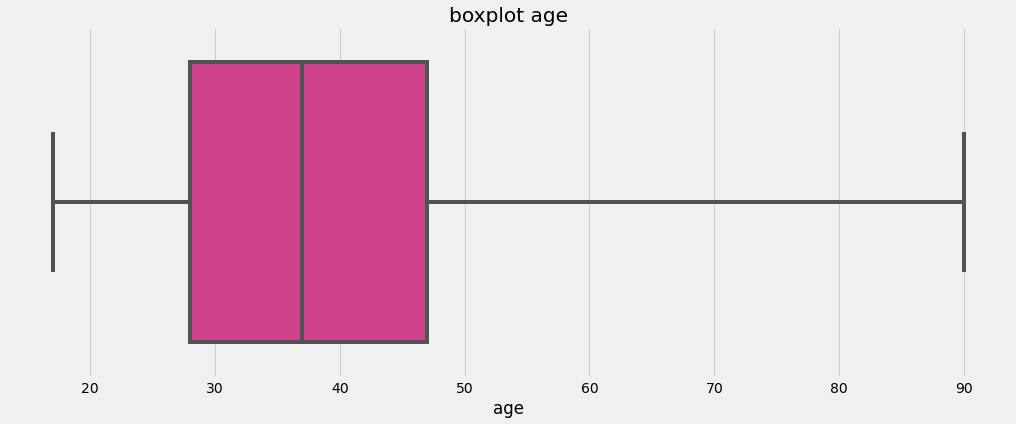

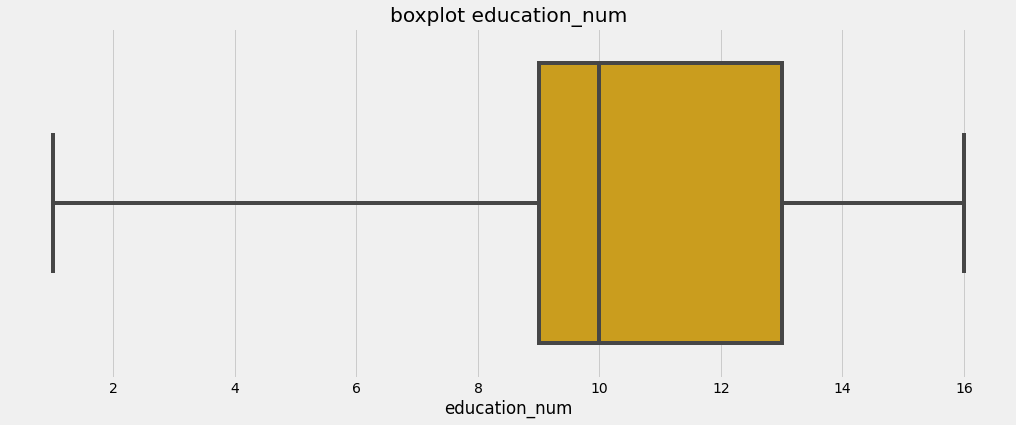

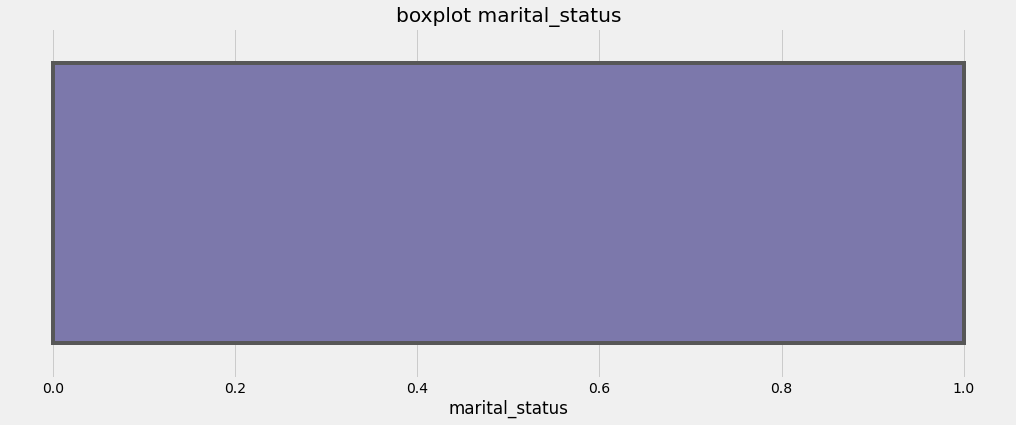

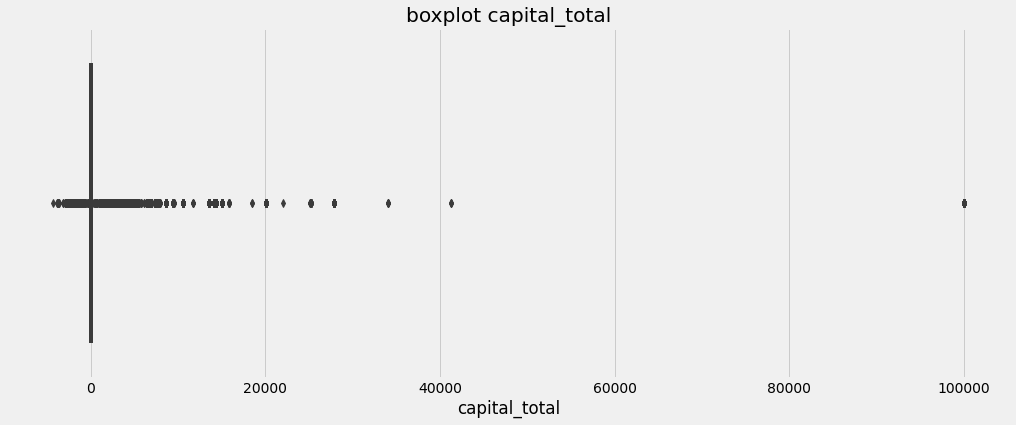

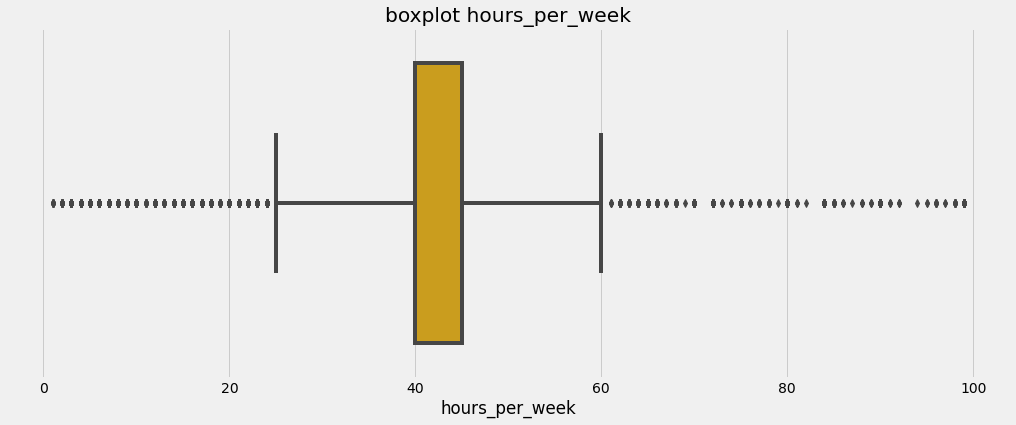

In [25]:
# Melakukan perulangan pada setiap kolom numerik dari df_cluster lalu melakukan visualisasi dengan boxplot
for i in numerical_cols(df_cluster):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=df_cluster[i], whis=3, color=get_random_cmap('Dark2', color_num=1))
    plt.title(f'boxplot {i}')
    plt.show()

Dari plot tersebut kita dapat menyimpulkan bahwa terdapat outlier pada atribut capital_total, dan hours_per_week. Kita bisa mengabaikan outlier pada capital_total, karena capital_total yang bernilai 0 artinya tidak melakukan investasi, lebih dari 0 berarti mendapatkan keuntungan berinvestasi, begitu pula sebaliknya.

Kita akan menghapus outlier pada atribut hours_per_week menggunakan metode quantile

In [26]:
# Mendefinisikan quantile 1 dan 3  sebesar 0.25 dan 0.75
Q1= df_cluster['hours_per_week'].quantile(0.25)
Q3= df_cluster['hours_per_week'].quantile(0.75)

# Mendefinisikan variabel iqr
IQR= Q3-Q1

# Menampilkan variabel q1,q3, dan iqr
Q1, Q3, IQR

(40.0, 45.0, 5.0)

Menentukan whis, atau pengali IQR, whis pada umumnya bernilai 1.5, namun khusus untuk kasus hours per week, yang memang mempunyai interval yang regang, kita menyetel whisnya cukup besar

In [27]:
whis= 5

Selanjutnya menentukan batas bawah dan batas atas

In [28]:
# Menentukan batas bawah dan batas atas
batas_bawah= Q1 - (whis*IQR)
batas_atas= Q3 + (whis*IQR)

# Menampilkan batas bawah dan batas atas
batas_bawah, batas_atas

(15.0, 70.0)

In [29]:
# Menyeleksi df_cluster berdasarkan atribut hours_per_week yang lebih besar dari batas bawah dan lebih baik dari batas atas
df_cluster= df_cluster[(df_cluster['hours_per_week']>= batas_bawah) & (df_cluster['hours_per_week']<= batas_atas)]

df_cluster

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country
0,39,Government,13,0,Adm-clerical,Not-in-family,White,Male,2174,40,United-States
2,38,Private,9,0,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States
3,53,Private,7,1,Handlers-cleaners,Husband,Black,Male,0,40,United-States
4,28,Private,13,1,Prof-specialty,Wife,Black,Female,0,40,Cuba
5,37,Private,14,1,Exec-managerial,Wife,White,Female,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,0,Prof-specialty,Own-child,White,Male,0,40,United-States
48837,39,Private,13,0,Prof-specialty,Not-in-family,White,Female,0,36,United-States
48839,38,Private,13,1,Prof-specialty,Husband,White,Male,0,50,United-States
48840,44,Private,13,0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,40,United-States


* **Normalisasi**

Melakukan normalisasi pada kolom numerik

In [30]:
# Melakukan normalisasi menggunakan metode min max scaler untuk kolom-kolom numerik pada df cluster
df_cluster[numerical_cols(df_cluster)]= MinMaxScaler().fit_transform(df_cluster[numerical_cols(df_cluster)])

df_cluster

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country
0,0.301370,Government,0.800000,0.0,Adm-clerical,Not-in-family,White,Male,0.062575,0.454545,United-States
2,0.287671,Private,0.533333,0.0,Handlers-cleaners,Not-in-family,White,Male,0.041742,0.454545,United-States
3,0.493151,Private,0.400000,1.0,Handlers-cleaners,Husband,Black,Male,0.041742,0.454545,United-States
4,0.150685,Private,0.800000,1.0,Prof-specialty,Wife,Black,Female,0.041742,0.454545,Cuba
5,0.273973,Private,0.866667,1.0,Exec-managerial,Wife,White,Female,0.041742,0.454545,United-States
...,...,...,...,...,...,...,...,...,...,...,...
48836,0.219178,Private,0.800000,0.0,Prof-specialty,Own-child,White,Male,0.041742,0.454545,United-States
48837,0.301370,Private,0.800000,0.0,Prof-specialty,Not-in-family,White,Female,0.041742,0.381818,United-States
48839,0.287671,Private,0.800000,1.0,Prof-specialty,Husband,White,Male,0.041742,0.636364,United-States
48840,0.369863,Private,0.800000,0.0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.094016,0.454545,United-States


## __*Clustering*__

* **K-Prototypes**

K-Prototypes adalah algoritma clustering hasil pengembangan dari algoritma K-Means untuk menangani clustering pada data dengan atribut bertipe campuran numerik dan kategorikal.

K-Prototypes menangani data numerik dengan algoritma K-Means dan data kategorik dengan algoritma K-Modes.

Saat proses fitting model, algoritma k-prototypes memerlukan sebuah parameter yang berupa list dari kolom kategorikal

In [31]:
# Melakukan perulangan pada setiap kolom kategorik lalu menggunakan metode get_loc() untuk mendapatkan indeks kolom
df_category_attr_cols_index= [df_cluster.columns.get_loc(col) for col in categorical_cols(df_cluster)]

df_category_attr_cols_index

[1, 4, 5, 6, 7, 10]

In [32]:
# Membuat model kprototye
kprototype = KPrototypes(
    n_clusters=2,
    init='Huang',
    n_init=20,
    max_iter=500,
    random_state=0,
    n_jobs=-1
)

# Melakukan fitting lalu prediksi
kprototype.fit_predict(df_cluster, categorical = df_category_attr_cols_index)

kprototype_labels= kprototype.labels_

In [33]:
df_cluster['cluster']= kprototype_labels

df_cluster

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country,cluster
0,0.301370,Government,0.800000,0.0,Adm-clerical,Not-in-family,White,Male,0.062575,0.454545,United-States,1
2,0.287671,Private,0.533333,0.0,Handlers-cleaners,Not-in-family,White,Male,0.041742,0.454545,United-States,1
3,0.493151,Private,0.400000,1.0,Handlers-cleaners,Husband,Black,Male,0.041742,0.454545,United-States,0
4,0.150685,Private,0.800000,1.0,Prof-specialty,Wife,Black,Female,0.041742,0.454545,Cuba,0
5,0.273973,Private,0.866667,1.0,Exec-managerial,Wife,White,Female,0.041742,0.454545,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0.219178,Private,0.800000,0.0,Prof-specialty,Own-child,White,Male,0.041742,0.454545,United-States,1
48837,0.301370,Private,0.800000,0.0,Prof-specialty,Not-in-family,White,Female,0.041742,0.381818,United-States,1
48839,0.287671,Private,0.800000,1.0,Prof-specialty,Husband,White,Male,0.041742,0.636364,United-States,0
48840,0.369863,Private,0.800000,0.0,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.094016,0.454545,United-States,1


## __*Performance Measure*__

Selanjutnya kita akan menguji performa model clustering yang telah dibuat

* **Silhouette Score**

Silhouette score adalah seberapa dekat/mirip suatu baris data dengan klusternya sendiri (kohesi) dibandingkan dengan kluster lain (separation). Silhouette score berkisar dari -1 hingga +1, di mana skor menunjukkan bahwa objek cocok dengan klusternya sendiri dan tidak cocok dengan kluster tetangga. 

Sebelum menghitung silhouette score, terlebih dahulu kita membuat variabel dataframe baru yang berisi sama dengan df_cluster kemudian melakukan categorical encoding serta normalisasi pada kolom kategorik yang tersisa. 

Hal ini dilakukan karena silhouette score membutuhkan data berbentuk numerik

In [34]:
# Membuat variabel df_cluster2
df_cluster2= df_cluster.copy()

# Melakukan kategorikal encoding dengan LabelEncoder pada kolom kategorikal df_cluster2 yang tersisa
Le= LabelEncoder()
for i in categorical_cols(df_cluster2):
  df_cluster2[i]= Le.fit_transform(df_cluster2[i])

# Melakukan normalisasi pada kolom kategorikal yang telah di-encode
df_cluster2.iloc[:,df_category_attr_cols_index]= MinMaxScaler().fit_transform(df_cluster2.iloc[:,df_category_attr_cols_index])

df_cluster2

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_total,hours_per_week,native_country,cluster
0,0.301370,0.000000,0.800000,0.0,0.000000,0.2,1.00,1.0,0.062575,0.454545,0.95,1
2,0.287671,0.333333,0.533333,0.0,0.384615,0.2,1.00,1.0,0.041742,0.454545,0.95,1
3,0.493151,0.333333,0.400000,1.0,0.384615,0.0,0.50,1.0,0.041742,0.454545,0.95,0
4,0.150685,0.333333,0.800000,1.0,0.692308,1.0,0.50,0.0,0.041742,0.454545,0.10,0
5,0.273973,0.333333,0.866667,1.0,0.230769,1.0,1.00,0.0,0.041742,0.454545,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0.219178,0.333333,0.800000,0.0,0.692308,0.6,1.00,1.0,0.041742,0.454545,0.95,1
48837,0.301370,0.333333,0.800000,0.0,0.692308,0.2,1.00,0.0,0.041742,0.381818,0.95,1
48839,0.287671,0.333333,0.800000,1.0,0.692308,0.0,1.00,1.0,0.041742,0.636364,0.95,0
48840,0.369863,0.333333,0.800000,0.0,0.000000,0.6,0.25,1.0,0.094016,0.454545,0.95,1


Dalam kasus ini, kita menggunakan metode clustering kprototype, yang menangani data numerik dengan k-means (yang menggunakan metric euclidean), serta data kategorik dengan k-modes (yang menggunakan metric matching). Oleh karena itu kita akan melakukan hal yang sama untuk menghitung silhouette score lalu melakukan perkalian dengan bobot untuk mendapatkan hasil keseluruhan silhouette score

In [35]:
# Mendefinisikan kolom numerik dan kolom kategorik
num_cols= numerical_cols(df_cluster.drop('cluster', axis=1))
cat_cols= categorical_cols(df_cluster)

# Menghitung silhouette score dari kolom numerik dengan metric euclidean
sil_score_num= silhouette_score(df_cluster2[num_cols], df_cluster2['cluster'])

# Menghitung silhouette score dari kolom kategorik dengan metric matching
sil_score_cat= silhouette_score(df_cluster2[cat_cols], df_cluster2['cluster'], metric='matching')

quantifier= ((sil_score_num*len(df_cluster2[num_cols].columns)-1) + (sil_score_cat*len(df_cluster2[cat_cols].columns)-1))
total_col= len(df_cluster2.columns)-1

# Melakukan perkalian bobot untuk mendapatkan hasil akhir silhouette score
sil_score= quantifier / total_col

print(f'Cluster comparison: {Counter(kprototype_labels)}')
print(f'Numerical silhouette score: {sil_score_num}')
print(f'Categorical silhouette score: {sil_score_cat}')
print(f'Silhouette score: {sil_score}')

Cluster comparison: Counter({1: 23107, 0: 20343})
Numerical silhouette score: 0.6529757239333045
Categorical silhouette score: 0.4940174526520896
Silhouette score: 0.38445303050718727


* **Homogeneity, Completeness, dan V Measure Score**

Ketiga metrik pengukuran ini membandingkan true label dengan hasil klustering, maka dari itu pertama-tama kita memerlukan true label

In [36]:
# Mendefinisikan index df_cluster
df_cluster_index= df_cluster['cluster'].index

# Mendefinisikan true label, baris-baris yang diambil pada df hanya baris yang bertahan pada df_cluster
# Kita juga melakukan label encoding pada true label
true_label= Le.fit_transform(df.loc[df_cluster_index,'salary_per_year'])

true_label


array([0, 0, 0, ..., 0, 0, 1])

1. Homogeneity Score

Hasil klustering memenuhi homogenitas (homogeneity score=1) jika semua clusternya hanya berisi titik-titik data yang merupakan anggota dari satu kelas.

Metrik ini tidak bergantung pada nilai absolut dari true label

In [37]:
print(f"Homogeneity Score: {homogeneity_score(true_label, df_cluster['cluster'])}")

Homogeneity Score: 0.19060415215740065


2. Completeness Score

Hasil klustering memenuhi kelengkapan (completeness score=1) jika titik data yang menjadi anggota dari true label adalah elemen dari cluster yang sama. Singkatnya completeness score adalah kebalikan dari homogeneity score. Metrik ini juga tidak bergantung pada nilai absolut dari true label

In [38]:
print(f"Completeness Score: {completeness_score(true_label, df_cluster['cluster'])}")

Completeness Score: 0.15515916379455308


3. V Measure Score

V measure score adalah cara untuk menghitung skor akurasi antara true label dengan hasil clustering. V measure score didapatkan dari rata-rata harmonik dari homogeneity dan completeness score

In [39]:
print(f"V Measure Score: {v_measure_score(true_label, df_cluster['cluster'])}")

V Measure Score: 0.17106488456179406


* **Plot**

In [40]:
from sklearn.decomposition import PCA

df_plot= df_cluster2.copy()
data= df_plot.drop('cluster',axis=1)

# Memulai PCA untuk mengurangi dimensi alias fitur menjadi 3
pca = PCA(n_components=3)
pca.fit(data)
df_pca = pd.DataFrame(pca.transform(data), columns = ['col_1', 'col_2', 'col_3'])

df_pca

,col_1,col_2,col_3
0,0.113573,-0.501721,-0.482783
1,0.094283,-0.553576,-0.125525
2,-0.655099,0.131438,-0.096623
3,0.344970,0.896001,0.333090
4,0.328280,0.951782,-0.122297
...,...,...,...
43445,0.237768,-0.534850,0.199641
43446,0.691740,0.128846,0.295736
43447,-0.695531,0.085265,0.233400
43448,0.283163,-0.446489,-0.480611


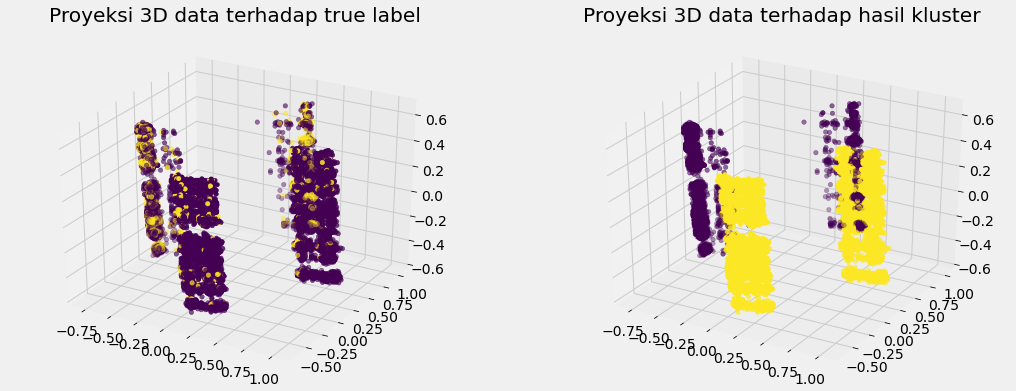

In [41]:
# Proyeksi 3D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x= df_pca['col_1']
y= df_pca['col_2']
z= df_pca['col_3']

# plotting
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121, projection="3d")
ax.scatter(x,y,z, marker="o", c=true_label)
ax.set_title("Proyeksi 3D data terhadap true label", pad=40)

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(x,y,z, marker="o", c=df_cluster['cluster'])
ax2.set_title("Proyeksi 3D data terhadap hasil kluster", pad=40)

plt.savefig('true_label_and_cluster_comparison.png')
plt.show()